## Linear Regression

y = Theta0 + Theta1 X1 + Theta2 X2 +... + ThetanXn
- y > predicted value 
- n > number features 
- xi is i feature value 
- zi > model parameter


- training a model means setting its parameter so that the model best fits the training set 


In [2]:
import numpy as np 

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.rand(m, 1)

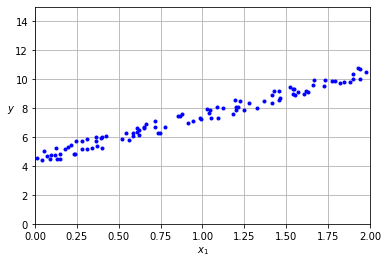

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()


In [4]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

- the @ perform matrix multiplication 
- if A and B are numpy array, the A @ B is equivalent to np.matmul(A,B) 
- many other libraries, like tensorflow, pytorch and jax suppoort @ opertor as well 
- however we cannot use @ on pure python arrays 

In [5]:
theta_best

array([[4.51359766],
       [2.98323418]])

- we would have hope for theta0 = 4 and theta1 = 3 instead of 4.215 and 2,770
- close enaugh bur noise made it imposible to recover the excat parameter of th eoriginal function 

In [6]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[ 4.51359766],
       [10.48006601]])

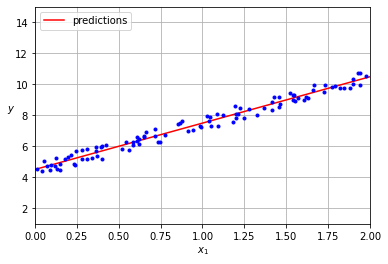

In [7]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(6,4))
plt.plot(X_new, y_predict, "r-", label="predictions")
plt.plot(X, y, "b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 1, 15])
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([4.51359766]), array([[2.98323418]]))

In [9]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

- scikit learn separate the bias from term (intercept_) from the feature weight (coef_)
- the linear regression class is based on the scipy.linalg.lstsq() function (the namse stand for "least square") shich you could call directly 

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.51359766],
       [2.98323418]])

- this function compute thetahat = X+ y, 
X+ is the pseudoinverse of X 
- we can use np.linalg.pinv() to compute pseudoinverse directly 

In [11]:
np.linalg.pinv(X_b) @ y

array([[4.51359766],
       [2.98323418]])

- pseudoinverse itself compute using a standard matrix factorization technique called singular value decomposition that can decompose the training set matrix X into the matrix multiplication of three matrices U E V1 

### computational complexity 

- the computation complexity is linear with regard to both the number of instance we want to make prediction in and the number of features 

### Gradient descent 

- gradient descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems 
- the general idea of gradient descent is to tweak parameters iteratively in order to minimize a cost fucntion 

- start by filling theta with random values (random initialization) 
- then improve it granually taking one baby step at atime 
- each step attempting to decrease the cost funtion 
- until the algorithm converege to a minimum 

- an important parameter in garident descent is the size of the steps 
- determine by the learning rate hyperparameter 
- if the learning rate is to small, then the algorithm will have to go throught many iteration to coverage , which take a long time 
- if the learning rate is too hight, we might jump across the valley and end up on the other side, this might make the algorithm divereg with large large values, failing to fing a good solutin  


problem
- additionaly not all cost function lok like nice regular bowls
- there may be holes, plateaus and ll sorts of irregular terrain making difficult to the global minimum 



solution 
- mse cost function for a linear regression model happens to be a convex function 
- which mean that if we pick any two points on the cirve the line segment joining them is never below the curve 
- this implies that there are no local minima just one global minimum

note 
- when using gradient descetm we should ensure that all feature have a similar scale 
- or it will take much longer time to converge 

### Batch gradient descent

- to implement gradient descent, we need to compute the gradient of the cost function with regrad to each model paramater theta j 
- in other owrds, we need to calculate how much the cost function will change if you cahneg theta j just a litle bit 
- this called a partial derivate 
- it is like asking "what is the slope of the montain under my feet if i fase east" and then asking same question facing nort and so on for all dimensions 

warning 
- this formula involves calculation over the full traiing set x at each gradient descent step this way the algorithm is called batch gradient descent it use whole batch of training data at every step 
- is slow on very large training set 
- however gradient descent scaler well with the number of features 
- training a linear regression model when there are hundred of thousands of feature is much faster using gradient descnet than normal equation or svd decomposition

- learning rate come into play 
- multiply the gradient vector by learning rate to determine the size of the downhill step 

In [12]:
eta = 0.1
n_epochs = 1000 
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    gradients = 2/ m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients 
    
theta

array([[4.51359766],
       [2.98323418]])

- this is exaclty what the normal wquation found 
- gradient descent work perfectly
- but what is we use different learning reta (eta)

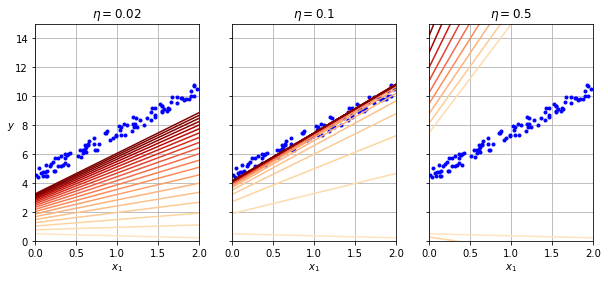

In [13]:
import matplotlib as mpl 

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
#save_fig("gradient_descent_plot")
plt.show()

- on the left learning is too low the algorithm will eventualy reach the solution but it will take a long time 
- in the midle the learning rate look preety good in just few epochs it has already converged to the solution 
- on the right the learning rate is to high the algorithm diverges jumping all over the place and actualy getting gurther and further away fromthe solution every step 

how to find good learning rate?
- to find a good learning rate we can use grid search 
- however we may to limit the number of epochs so the grid seacrh can eliminate models that tje too long to converge 

how to set number epoch
- simple solution is to set a very large number of epochs but to interupt the algorithm when  the gradient vector become tiny that is when its norm becomes smaller than a tiny number
- this happen because gradient descent has almost reached the minimum

### Stochastic gradient descet 

batch gradient descent problem 
- the main problem with batch gradient descent is the that it use the whole training set to compute gradient every step 
- it will make it very sloe when training set is large

stochastic 
- picks a random indtance in trainig set every step and compter the gradient based only that single instance 
- obviously working on a single instanve at a time make the algorithm much faster because it has very litle data to manipulate at every itaration 
- possible to train huge traing set 

minus 
- much less regular than batcj gradient descrny insted ofgente decreasing until it reaches the minimum 
- the cost funtion will bounce up and down 
- decreasing onlu on average 
- it will end up very close to the minimum but once it gets there it will continue to counc around never seeling doen 
- once the algorithm stop the final parameter values will be good but not optimal


problem 
- randomnes is good to escape from local optime 
- but bad becomes it means that the algorithm can never settle at the minimum 

solution 
- gradually reduce the learning rate 
- start out large the get smaller and smaller alowing the algorithm to settke at the global minimum 
- this procees is akin to simulates annealing  

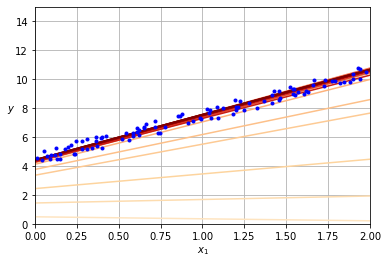

In [14]:
theta_path_sgd = []

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # extra code – to generate the figure

# extra code – this section beautifies and saves Figure 4–10
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()


- gradient descent code iterated 1000 time though the whole training 
- this code throught the training set only 50 time and reach a prety good solution 

In [15]:
theta

array([[4.51548062],
       [2.9775157 ]])

warning
- when using stochastic gradient descent the training instance must be independent and identically distributed to ensure that the parameter get pulled toward the global optimum on average 
- a simple way to ensure this is to shuffle the instance during training 
- if the instance sorted by label then sgd will start by optimizing for one label then the next and so on and it will not settle close to the global minimum 

sgg woth scikit learn 
- max 1000 epoch 
- loss drop by lee than 10^-5 during 100 epoch 
- learning rate 0.01

In [16]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, 
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.50316965]), array([2.99156535]))

- the result quite close to one returned by the normale quation 

### Mini Batch Gradient Descentn 

- instead of cimputing the gradient descent based on the full training set (batcg sgd) or based on jusy one instance ( as in stochastic sgd)
- mini batch gd compute the gradient on small random sets intance called mini batches
- the main advantage of mini batch gd over stochastoc gd is that we can get performanve boost from hardware optimization of matrix operation, especially when using gpus 
- the result walking around  a bit closer to the minimum than stochastic gd but it may be harder for it to escape from local minima 

### Polynomial Regression 

- if data is more complex than a straight line 
- we can use a linear model to fit nonlinear data 
- a simple way to do this is to add powers of each feature as new feature, them train a linear model on this extended set of features > polynomail regression

In [18]:
np.random.seed(42)
m=100
X= 6 * np.random.rand(m, 1) - 3
y= 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1) 

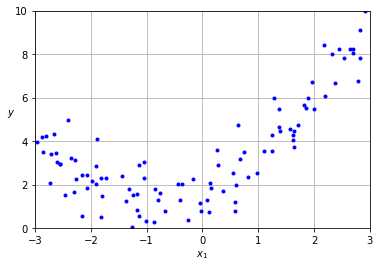

In [19]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()


- clearly a straight line will never fit this data properly 
- lets use sklean polynomial features class to transform our trainingdata 
- adding the square of each feature in the training set as a new feature 

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [21]:
X_poly[0]

array([-0.75275929,  0.56664654])

- X_poly now contain the original feature of x plus the square of this feature 
- now we can fit a linear regression model to this extended training data 

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

- the model estimate y^ = 0.56x1^2 + 0.93x1 + 1.78
- when the original function was y = 0.5x1^2 + 1.0x1 +2.0 + gaussian noise

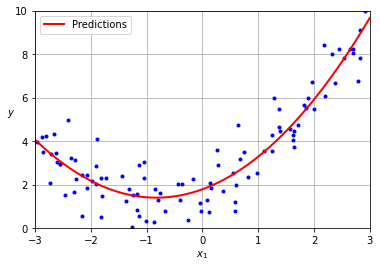

In [23]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

note 
- when there are multiple feature polynomial regression is capable to finding relationship betwen fetaures 
- which is something a plain linear regression model cannot do 
- this is made possible by the fact that polynomail feature also add all combinations of feature up to the given degree 
- example if there were two feature a ns d b polynomial feature with degree=3 woud not only add the feature a^2, a^3, b^2, b^3 but also combination ab, a^2b, and ab^2

### Leaning Curves 

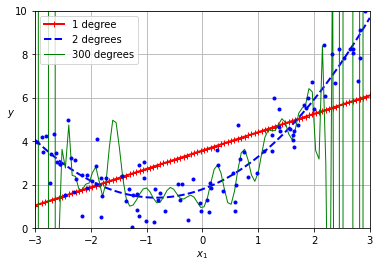

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

- this hugh degree polynomial regression model is severly overfitting the training data 
- while the linear model is under fitting 
- the model that will generalix best in this cae is the quadratic model , which make sense because the data was generated using a quadratic model 


how we can tell that model is iverfitting or underfitting the data
- in chapter 2 we used corss valudation to get an aestimate of a model generalize performance 
- if model perform well on the training data but generalize poorly acording to the cross validation metrics then your model is overfitting 
- if perform poorly on both then it is underfitting 
- this is one way to tell when a model is to simple or too complex 

another way to tell is to look at the learning curves 
- which are plots of the model training error and validation error as a functioon of the training iteration 
- just evaluate the model at regular intervals during training on both at the training set and validation set and plot the resuts


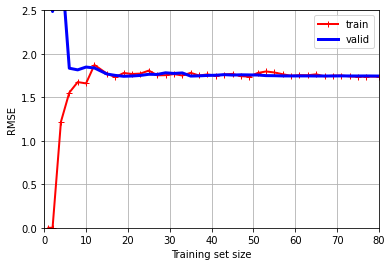

In [25]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), 
                                                         cv=5, scoring='neg_root_mean_squared_error')
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])

plt.show()


training error
- this model is undefitting 
- to see why lets firt look at the training error
- when there are just one to two instance in the training set, the model can fit them perfectly which us why the curve start at zero 
- but as new instance are added to the training set it becomes imposible for the model to fit the training data perfectly , both because the data is noisy and because it is not linear at all
- so the error on the training data goes up until it reach the plateau at which point adding new instance to the training set doesnt make average error much better or worse

valdation error 
- when the model is trained on bery few training instance it is incapable of generalizing properly whic is why yje validation error is initially quite large and slowly goes down 
- then as the model is shown training example ot learn and thus the validation error slowly goes down 
- however once again a straight line cannot do a good job of modeling the data so the erro ends up at plateau very close to the other curve

tip
- if model is underffitng the training data adding more training example will not hepl
- we need use a better model or come up with better features

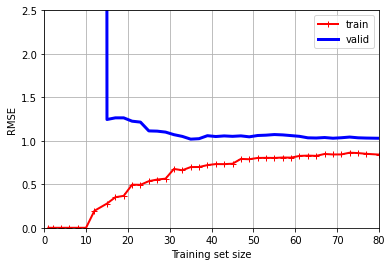

In [26]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(PolynomialFeatures(degree=10, include_bias=False), LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring='neg_root_mean_squared_error'
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])

plt.show()

the learning curve look a bit like the previous ones but there are two very important differences:
- the error on the training data is much lower than before 
- there is gap beyween the curves. this mean that the model perfoms significantly better on the training data rthan on the validation data whic is the hallmark of an overfitting model 
- if we used a much larger training set however the to curve would contoniue to get closer 

tip
- one way to improve an overfitting model is to feed more training data until the validation error reaches the training error

bias variance trade off 
- bias > is due wrong assumption 
- variance > sensitifity to small variatuion
- irreducible error > is die to the noisiness of the data itself 

### Regularized Linear models

a good way to reduce overfitting to regularize the model 
- the fewer degeree of fredin it has the harder it will be for it to overfitting the data 
- a simple way to regularize a polynomial model is to reduce the number of polynomial degrees
- for linear model regularization is typically achieved by sontraining the weight of the model

we will look how to implement at three different ways to constraon the weights 
- ridge regression 
- lasso regression 
- elastic net regression 


### Ridge Regression 

- also called tikhonov regularization 
- is regularized version o flinear regression 
- this forece the learning algorithm to not only fit the data but also keep the model weights as small as possible 
- note that the regularization term should only be added to the cost function during training 
- once the model is trained, we want to use the unreqularized mse to evaluate the model performance 

- the hyperparametr alfa control how much we want to regularize the model 
- if alfa=0 then rodge regression is just linear regression 
- if alfa is very large, hen all weight end up very close to zero and the result is a flat line going throught the data mean 

- it is important to scale the data before performing ridge regression as it is sensitive to the scale of the input features 
- this is tru of most regularized models

In [32]:
# extra code – we've done this type of generation several times before
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

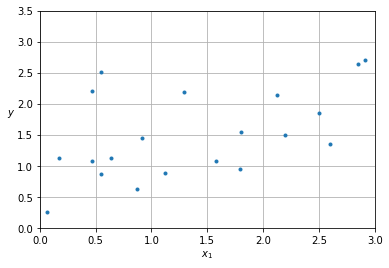

In [33]:
# extra code – a quick peek at the dataset we just generated
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()


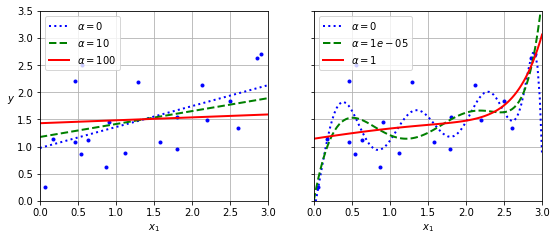

In [35]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()


on the left 
- plain ridge model are used , leading to linear prediction 

on the roght
- the data is forst expanded using polynomialfeature degree=10
- then scaled using standardscaler 
- and finaly the ridge model re applied to resulting features 
- this is polynomail regression with ridge regularization

note 
- how increasing alfa lead to flatter prediction 
- thus reducing the model variance but increasing its bias 

In [36]:
from sklearn.linear_model import Ridge 
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

In [37]:
# using stochastic gradient descent 
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1/m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel()) # yravel because fit expect 1d targets
sgd_reg.predict([[1.5]])

array([1.55302613])

- the penalty hyperparamter sets the type of regularization term to use 
- specifying "l2" indicates that we want sgd to add regularization termto the mse cost function equal to alpfa time the square of the l2 norm of the weight vector 
- this is just like ridge regression except there is no division by m in this case 
- that way we passes alpha=0.1/m to get the same result as ridge alpha 0.1

In [38]:
# extra code – show that we get roughly the same solution as earlier when
#              we use Stochastic Average GD (solver="sag")
ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55326019]])

- the ridge cv class also perform ridge regresesion but it automaticaly tunes hyperparameter using cross validation 
- it roughly equivalent to using gridsearchcv but it is optimized for ridge regresiion and runs much faster 

### Lasso Regression

least absolute shrinkage  ans selection operate regression > lasso
- is another reqularized version of linear regression 
- just like ridge regression, it adds a regularization term to the cost function but it use l1 norm of the weight vector 
- l1 norm multiplied by 2alfa wehre the l2 norm was multiplied by alfa/m in ridge regreeion 
- these factor were choosen to ensure that the optimal alfa value is independent from the training set size 

In [39]:
from sklearn.linear_model import Lasso

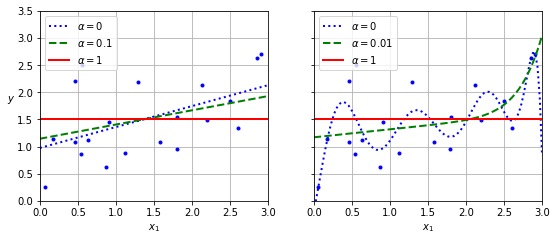

In [40]:
# extra code – this cell generates and saves Figure 4–18
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)

plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)

plt.gca().axes.yaxis.set_ticklabels([])
plt.show()


an important characteristic of lasso 
- is that it tend to eliminate the weight of the least important features 
- example, the dased line in righthand plot with alfa 0.02 look roughlt cubic, all the weights for the high degree polynomial feature are equal to zero in other word lasso regresseion automalicaly perform feature selection and output a sparse model with few non zero feature weight

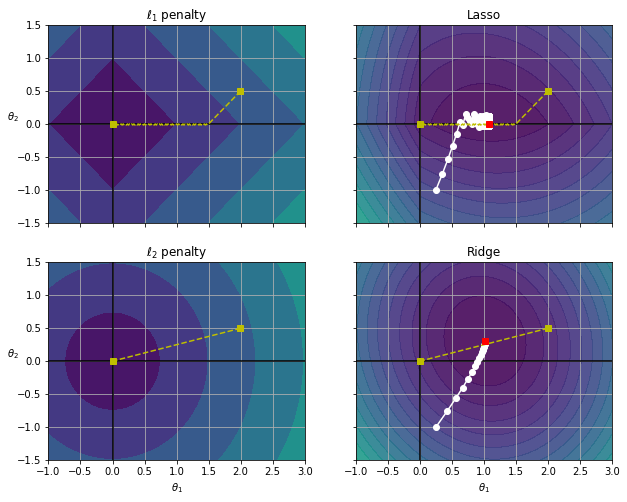

In [41]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

plt.show()


- axes represent two model parameters 
- background contour represent different loss function  


In [42]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])


array([1.53788174])

### Elastic Net Regression

elastic net regression
- is a middle goriund between ridge ans lasso regression 
- the regularization term is a weighted sum of both ridge and lasso regularization term ans we can control the mix ratio r 
- when r=0 elastic net is equivalent to ridge regression and when r=1 it is equivalent to lasso regression 

when shoudl we use elastic net, ridge or lasso or plain regression ? 
- it is almost always preferable to have at least a little bit of regularization so generally we should avoid plain linear regression 
- ridge is good default but if we suspect that only a few feature are useful prefer lasso or elastic net because they tend ti reduce the useless features weight down to zero
- in general elastic net is prefered over lasso because lasso may behave erraticaly when the number of feature os grether than the number of training instance or when several features are strongly correlated 


In [43]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Early Stopping 

- stop training as soon as the validation error reches a minimum > early stopping
- with early stopping we just stop training as soo  as the validation error reaches the minimum 
- is is such a simple and efficient regularization technique that geoffrey hintol calles it a beautiful free lunch 

note 
- with stockhastc and mini batch gradient descent the curve are not smooth and it may be gard to know wheter we have reached the minimum or not 
- one solution is to stop only if after the validation error has been above the minimum for some time
- the role back the model parameter to the point where the validation error was at a minimum 

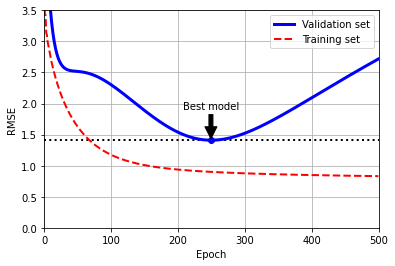

In [44]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# extra code – creates the same quadratic dataset as earlier and splits it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # extra code – it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train, y_train_predict, squared=False)
    val_errors.append(val_error)
    train_errors.append(train_error)

# extra code – this section generates and saves Figure 4–20
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()

### Logistic Regression

- is commoly used to estimate the probability that an instance to a particular class 
- if the estimated probability is greater than agiven threshold typically 50% then he model predict that the instance belong to tha class and otherwise it predict that it does not 
- this make binary classifier

estimating probabilities
- logistic regression model computer a weighted sum of the input features 
- but instead of outputing the result directly like the linear regression model does, t outputs the logistic of this results

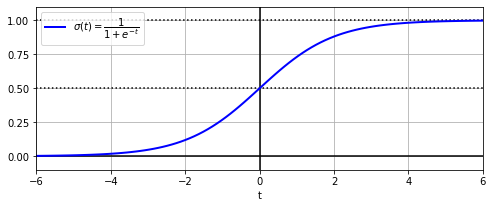

In [45]:
lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.show()


Training and cost function
- the objective of training is to set the parameter vector theta so that themodel estimate high probabilities for positive instance y=1 and low probabilities for egative instance y=0 


In [46]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [47]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
iris.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [49]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [50]:
# split the data and train a logistic regression mpdel on the training set 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == "virginica"

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42)

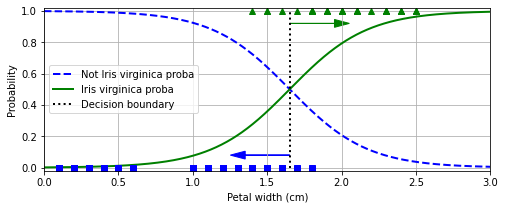

In [51]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()


- the petal width of iris virginica flowers (represent as triangles) range from 1.4 to 2.5 cm
- while the other iris flower represent by square generally have smaller petal width ranging from 0.1 to 1.8 cm 
- there is a bit of overlap 
- above about 2 cm the classifier is highly confident that the flower is an iris virginica 
- while above 1 cm is higly confident that is not an iris virginica 


In [52]:
decision_boundary

1.6516516516516517

- there is decision boundary at around 1.6 cm 
- where both probabilities are equal to 50% 
- if the petal width is greater than 1.6 cm the classifier will predict hat the flower is an iris verginica and otherwise it will predict that is not 

In [53]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

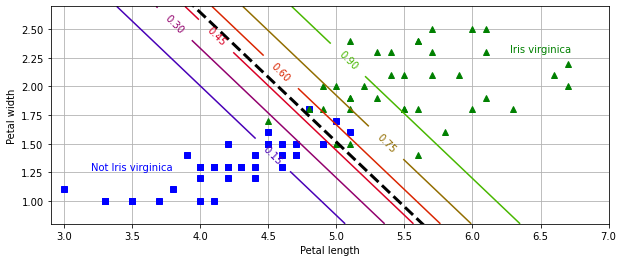

In [54]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.show()


- the dashed line represent the point where the model estimate a 50% probability this is the model decision boundary 
- note this is a linear boundary 
- each paralel line represent the point where the model output a specific probability from 15% bottom left to 90% top right 
- all flower beyidn the top right line have over 90% cahnge of being iris virgina according the model  

- logistic regression model is not alpa but its inverce : C
- the higher value of c the less the model is regularized
- logistic regression model can be regularized using l1 dan l2 
- scikit learn actually adds an l2 penalty by default 

### Softmax regression 

softmax regression or multinomail logistic regression
- logistic regression model can be generalized to support multiple class directly 
- without having to train and combine multiple binary classifier 


In [55]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

softmax_reg.predict([[5, 2]])

array([2])

In [57]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

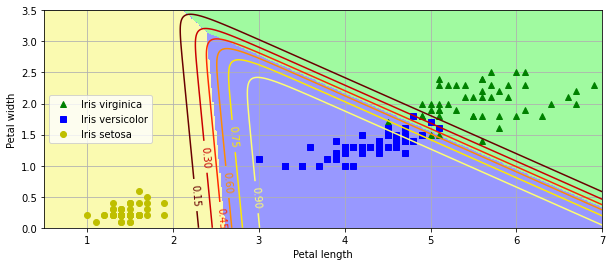

In [58]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.show()

- show the resulting decision boundaries represent by the background color 
- notice that the decision boudaries between any two classes are linear 
- the figure also the probablities for the iris verscolor class represented by the curved lines 0.3 represent 30% probability boundarues 